In [1]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action="ignore", category=DataConversionWarning)
warnings.filterwarnings(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", category=UserWarning)

In [2]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

from sklearn.impute import SimpleImputer

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.dummy import DummyClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error, accuracy_score, SCORERS

In [3]:
# Read the csv file into a dataframe object
df = pd.read_csv("datasets/dataset_shopping.csv")

# Shuffle the dataset
df = df.sample(frac=1, random_state=2)
df.reset_index(drop=True, inplace=True)

In [4]:
# First check the datatypes of the columns to see if they are all correct by comparing them to info retrieved with describe()
df.dtypes

admin_num_pages       int64
admin_duration      float64
info_num_pages        int64
info_duration       float64
prod_num_pages        int64
prod_duration       float64
bounce_rate         float64
exit_rate           float64
page_value          float64
special_day         float64
month                object
operating_system      int64
browser               int64
region                int64
referrer              int64
visitor              object
weekend                bool
purchase               bool
dtype: object

In [5]:
df.describe(include="all")

,admin_num_pages,admin_duration,info_num_pages,info_duration,prod_num_pages,prod_duration,bounce_rate,exit_rate,page_value,special_day,month,operating_system,browser,region,referrer,visitor,weekend,purchase
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [6]:
# checking for nans

df.isnull().values.any()

False

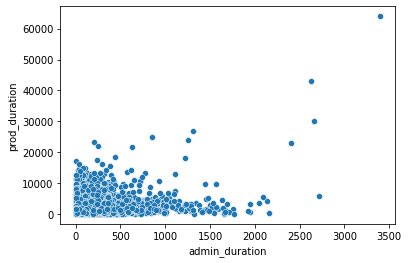

In [7]:
#Some clear outliers can be seen in this scatterplot of admin_duration vs prod_duration
plot = scatterplot(x="admin_duration", y="prod_duration", data=df)

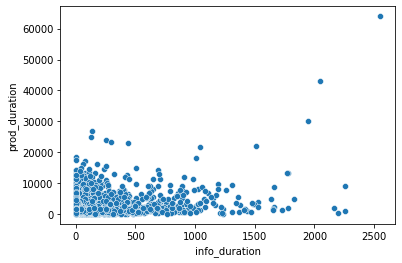

In [8]:
#Some clear outliers can also be seen in this graph of info_duration
plot = scatterplot(x="info_duration", y="prod_duration", data=df)

In [9]:
df = df[df.prod_duration<30000]
df = df[df.admin_duration<2300]
df = df[df.info_duration<1900]

In [10]:
# Split off the test set: 20% of the dataset

rest_of_df, test_df = train_test_split(df, train_size=0.8, stratify=df["purchase"], random_state=2)

In [11]:
# Creating a copy of the dataset for dataset exploration
copy_df = rest_of_df.copy()

# Have a look at the correlations to get ideas for feature engineering
copy_df.corr()

,admin_num_pages,admin_duration,info_num_pages,info_duration,prod_num_pages,prod_duration,bounce_rate,exit_rate,page_value,special_day,operating_system,browser,region,referrer,weekend,purchase
admin_num_pages,1.000000,0.618067,0.378064,0.253081,0.425858,0.384335,-0.221107,-0.314077,0.100908,-0.096385,-0.007414,-0.026469,0.002423,-0.033864,0.025420,0.142005
admin_duration,0.618067,1.000000,0.280933,0.189963,0.246856,0.273877,-0.145809,-0.209171,0.073251,-0.076829,-0.015628,-0.020689,0.002050,-0.023564,0.010004,0.105595
info_num_pages,0.378064,0.280933,1.000000,0.614478,0.364073,0.369619,-0.116240,-0.163867,0.047065,-0.043017,-0.007621,-0.043392,-0.025801,-0.038023,0.033461,0.097215
info_duration,0.253081,0.189963,0.614478,1.000000,0.267592,0.289825,-0.077896,-0.111066,0.034308,-0.023169,-0.008939,-0.022246,-0.021682,-0.022745,0.026172,0.073202
prod_num_pages,0.425858,0.246856,0.364073,0.267592,1.000000,0.879737,-0.204493,-0.293478,0.057578,-0.024311,0.003324,-0.018889,-0.034538,-0.044927,0.012521,0.160045
prod_duration,0.384335,0.273877,0.369619,0.289825,0.879737,1.000000,-0.194830,-0.267134,0.057900,-0.036859,-0.001299,-0.014319,-0.029648,-0.039360,0.000534,0.164264
bounce_rate,-0.221107,-0.145809,-0.116240,-0.077896,-0.204493,-0.194830,1.000000,0.911472,-0.119767,0.083767,0.028160,-0.007400,-0.008290,0.076011,-0.047634,-0.149944
exit_rate,-0.314077,-0.209171,-0.163867,-0.111066,-0.293478,-0.267134,0.911472,1.000000,-0.175639,0.111604,0.018261,0.004349,-0.012779,0.075582,-0.062806,-0.205576
page_value,0.100908,0.073251,0.047065,0.034308,0.057578,0.057900,-0.119767,-0.175639,1.000000,-0.065778,0.013471,0.036954,0.013290,0.014345,0.014063,0.509187
special_day,-0.096385,-0.076829,-0.043017,-0.023169,-0.024311,-0.036859,0.083767,0.111604,-0.065778,1.000000,0.013752,-0.003210,-0.016673,0.052910,-0.016352,-0.085503


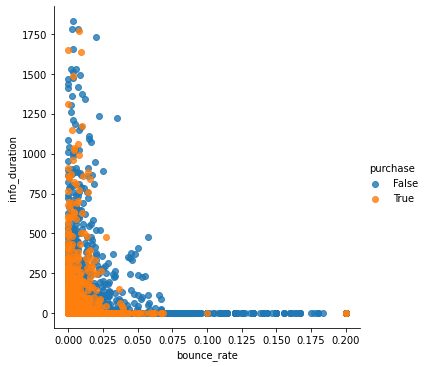

In [12]:
# Used various graphs in an attempt to get an insight into possible good features
plot = lmplot(x="bounce_rate", y="info_duration", hue="purchase", data=copy_df, fit_reg=False) 

In [14]:
# sigmoid of the page_value would be even better. -0.62 correlation which is great.

copy_df["sig_pv"] = 1/(1 + np.exp(copy_df["page_value"]))

# Can be seen in correlation table
copy_df.corr()

,admin_num_pages,admin_duration,info_num_pages,info_duration,prod_num_pages,prod_duration,bounce_rate,exit_rate,page_value,special_day,operating_system,browser,region,referrer,weekend,purchase,sig_pv
admin_num_pages,1.000000,0.618067,0.378064,0.253081,0.425858,0.384335,-0.221107,-0.314077,0.100908,-0.096385,-0.007414,-0.026469,0.002423,-0.033864,0.025420,0.142005,-0.326067
admin_duration,0.618067,1.000000,0.280933,0.189963,0.246856,0.273877,-0.145809,-0.209171,0.073251,-0.076829,-0.015628,-0.020689,0.002050,-0.023564,0.010004,0.105595,-0.228312
info_num_pages,0.378064,0.280933,1.000000,0.614478,0.364073,0.369619,-0.116240,-0.163867,0.047065,-0.043017,-0.007621,-0.043392,-0.025801,-0.038023,0.033461,0.097215,-0.206212
info_duration,0.253081,0.189963,0.614478,1.000000,0.267592,0.289825,-0.077896,-0.111066,0.034308,-0.023169,-0.008939,-0.022246,-0.021682,-0.022745,0.026172,0.073202,-0.161666
prod_num_pages,0.425858,0.246856,0.364073,0.267592,1.000000,0.879737,-0.204493,-0.293478,0.057578,-0.024311,0.003324,-0.018889,-0.034538,-0.044927,0.012521,0.160045,-0.256381
prod_duration,0.384335,0.273877,0.369619,0.289825,0.879737,1.000000,-0.194830,-0.267134,0.057900,-0.036859,-0.001299,-0.014319,-0.029648,-0.039360,0.000534,0.164264,-0.256044
bounce_rate,-0.221107,-0.145809,-0.116240,-0.077896,-0.204493,-0.194830,1.000000,0.911472,-0.119767,0.083767,0.028160,-0.007400,-0.008290,0.076011,-0.047634,-0.149944,0.178309
exit_rate,-0.314077,-0.209171,-0.163867,-0.111066,-0.293478,-0.267134,0.911472,1.000000,-0.175639,0.111604,0.018261,0.004349,-0.012779,0.075582,-0.062806,-0.205576,0.253818
page_value,0.100908,0.073251,0.047065,0.034308,0.057578,0.057900,-0.119767,-0.175639,1.000000,-0.065778,0.013471,0.036954,0.013290,0.014345,0.014063,0.509187,-0.628480
special_day,-0.096385,-0.076829,-0.043017,-0.023169,-0.024311,-0.036859,0.083767,0.111604,-0.065778,1.000000,0.013752,-0.003210,-0.016673,0.052910,-0.016352,-0.085503,0.069032


In [15]:
# Create a function to add the new feature during preprocessing

class Insert_sig_pv(BaseEstimator, TransformerMixin):
    def __init__(self, insert=True):
        self.insert=insert
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.insert:
            X["room_size"]=1/(1 + np.exp(X["page_value"]))
            X=X.replace([np.inf, -np.inf], np.nan)
        return X

In [16]:
# The features
features = ["admin_num_pages", "admin_duration", "info_num_pages", "info_duration", "prod_num_pages", "prod_duration",
            "bounce_rate", "exit_rate", "page_value", "special_day", "referrer", "region", "browser", "operating_system",
            "visitor", "weekend", "month"]

# Features that need to be one hot encoded
nominal_features = ["referrer", "region", "browser", "operating_system", "visitor", "weekend", "month"]

#Features that need to be scaled
numerical_features = ["admin_num_pages", "admin_duration", "info_num_pages", "info_duration", "prod_num_pages", "prod_duration",
            "bounce_rate", "exit_rate", "page_value", "special_day"]

# Extract the features
rest_of_X = rest_of_df[features]
test_X = test_df[features]

# Target values, encoded and converted to a 1D numpy array
label_encoder = LabelEncoder()
rest_of_y = label_encoder.fit_transform(rest_of_df["purchase"])
test_y = label_encoder.fit_transform(test_df["purchase"])

preprocessor = ColumnTransformer([
    ("nom", Pipeline([("binarizer", OneHotEncoder(handle_unknown="ignore")),
                      ]), nominal_features),
    ("num", Pipeline([("sigpv", Insert_sig_pv()), ("scaler", StandardScaler())]), numerical_features)],
        remainder="passthrough")

In [17]:
# get an idea of accuracy to beat with majority class classifier
maj = DummyClassifier()
maj.fit(rest_of_X, rest_of_y)
accuracy_score(test_y, maj.predict(test_X))

0.7273833671399594

## KNN

In [18]:
# Create a pipeline that combines the preprocessor with kNN
knn = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", KNeighborsClassifier())])

# Create a dictionary of hyperparameters for kNN.
knn_param_grid = {"predictor__n_neighbors": [60, 61, 62],
                  "preprocessor__num__sigpv__insert": [True, False]}

# Create the grid search object which will find the best hyperparameter values based on validation error
knn_gs = GridSearchCV(knn, knn_param_grid, scoring="accuracy", cv=10)

# Run grid search by calling fit
knn_gs.fit(rest_of_X, rest_of_y)

# Check Results
print(knn_gs.best_params_, knn_gs.best_score_)

{'predictor__n_neighbors': 61, 'preprocessor__num__sigpv__insert': True} 0.896814695071097


## Logistic Regression

In [19]:
lr = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", LogisticRegression(random_state=2, max_iter=1000, solver="liblinear"))])

# Create a dictionary of hyperparameters for lr
lr_param_grid = {"predictor__penalty": ['l2', 'l1'],
                 "predictor__C": [0.43, 0.44, 0.45],
                 "predictor__fit_intercept": [True, False],
                 "preprocessor__num__sigpv__insert": [True, False]}

# Create the grid search object which will find the best hyperparameter values based on validation error
lr_gs = GridSearchCV(lr, lr_param_grid, scoring="accuracy", cv=10)

# Run grid search by calling fit
lr_gs.fit(rest_of_X, rest_of_y)

# Check Results
print(lr_gs.best_params_, lr_gs.best_score_)

{'predictor__C': 0.44, 'predictor__fit_intercept': True, 'predictor__penalty': 'l2', 'preprocessor__num__sigpv__insert': True} 0.8983364051029128


## Decision Tree

In [20]:
dt = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", DecisionTreeClassifier(random_state=2))])

# Create a dictionary of hyperparameters for dt
dt_param_grid = {"predictor__max_depth": [3, 4, 5]}

# Create the grid search object which will find the best hyperparameter values based on validation error
dt_gs = GridSearchCV(dt, dt_param_grid, scoring="accuracy", cv=10)

# Run grid search by calling fit
dt_gs.fit(rest_of_X, rest_of_y)

# Check Results
print(dt_gs.best_params_, dt_gs.best_score_)

{'predictor__max_depth': 4} 0.9019871088642004


## Random Forest

In [21]:
rf = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", RandomForestClassifier(random_state=2))])

# Create a dictionary of hyperparameters for rf
rf_param_grid = {"predictor__n_estimators": [29, 30, 31],
                 "predictor__max_depth": [10, 11, 12]}

# Create the grid search object which will find the best hyperparameter values based on accuracy
rf_gs = GridSearchCV(rf, rf_param_grid, scoring="accuracy", cv=10)

# Run grid search by calling fit
rf_gs.fit(rest_of_X, rest_of_y)

# Check Results
print(rf_gs.best_params_, rf_gs.best_score_)

{'predictor__max_depth': 11, 'predictor__n_estimators': 30} 0.9038148289247434


In [22]:
# Re-training the Random Forest on rest_of_df

rf.set_params(**rf_gs.best_params_) 
rf.fit(rest_of_X, rest_of_y)
accuracy_score(test_y, rf.predict(test_X))

0.8981744421906693